1. Compute the average temperature by season ('season_desc'). (The temperatures are numbers between 0 and 1, but don't worry about that. Let's say that's the Shellman temperature scale.)

In [6]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame


In [7]:
weather = pd.read_table('daily_weather.tsv')


In [8]:
weather.groupby('season_desc').agg({'temp': np.mean})


,temp
season_desc,
Fall,0.711445
Spring,0.321700
Summer,0.554557
Winter,0.419368


In [9]:
fix = weather.replace("Fall", "Summer_").replace("Summer", "Spring_").replace("Winter", "Fall_").replace("Spring", "Winter_")

In [10]:
weather.groupby('season_desc').agg({'temp': np.mean})

,temp
season_desc,
Fall,0.711445
Spring,0.321700
Summer,0.554557
Winter,0.419368


2. Various of the columns represent dates or datetimes, but out of the box pd.read_table won't treat them correctly. This makes it hard to (for example) compute the number of rentals by month. Fix the dates and compute the number of rentals by month.

In [11]:
weather['months'] = pd.DatetimeIndex(weather.date).month


In [12]:
weather.groupby('months').agg({'total_riders': np.sum})


,total_riders
months,
1,96744
2,103137
3,164875
4,174224
5,195865
6,202830
7,203607
8,214503
9,218573


weather[['total_riders', 'temp']].corr()


3.Investigate how the number of rentals varies with temperature. Is this trend constant across seasons? Across months?

In [13]:
weather[['total_riders', 'temp', 'months']].groupby('months').corr()


temp  total_riders
months                                     
1      temp          1.000000      0.689495
       total_riders  0.689495      1.000000
2      temp          1.000000      0.716206
       total_riders  0.716206      1.000000
3      temp          1.000000      0.735575
       total_riders  0.735575      1.000000
4      temp          1.000000      0.533387
       total_riders  0.533387      1.000000
5      temp          1.000000      0.065599
       total_riders  0.065599      1.000000
6      temp          1.000000     -0.330884
       total_riders -0.330884      1.000000
7      temp          1.000000     -0.184704
       total_riders -0.184704      1.000000
8      temp          1.000000      0.288264
       total_riders  0.288264      1.000000
9      temp          1.000000     -0.418753
       total_riders -0.418753      1.000000
10     temp          1.000000      0.466666
       total_riders  0.466666      1.000000
11     temp          1.000000      0.511232
       total_riders  0.511232      1.000000
12     temp          1.000000      0.690062
       total_riders  0.690062      1.000000

weather[['total_riders', 'temp', 'season_desc']].groupby('season_desc').corr()


In [14]:
weather[['no_casual_riders', 'no_reg_riders', 'temp']].corr()


,no_casual_riders,no_reg_riders,temp
no_casual_riders,1.000000,0.274984,0.542253
no_reg_riders,0.274984,1.000000,0.607425
temp,0.542253,0.607425,1.000000


4.There are various types of users in the usage data sets. What sorts of things can you say about how they use the bikes differently?

In [15]:
weather[['no_casual_riders', 'no_reg_riders']].corr()


,no_casual_riders,no_reg_riders
no_casual_riders,1.000000,0.274984
no_reg_riders,0.274984,1.000000


In [16]:
weather[['is_holiday', 'total_riders']].sum()


is_holiday           11
total_riders    2049576
dtype: int64

In [17]:
weather[['is_holiday', 'total_riders']].corr()

,is_holiday,total_riders
is_holiday,1.000000,-0.118134
total_riders,-0.118134,1.000000


Part 2

In [18]:
import matplotlib.pyplot as plt


In [19]:
%matplotlib inline

1. Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

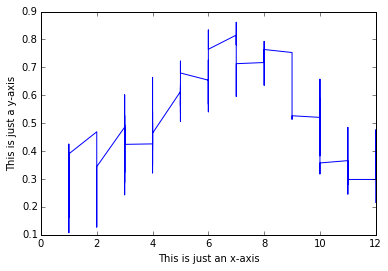

In [20]:
plt.plot(weather['months'], weather['temp'])
plt.xlabel("This is just an x-axis")
plt.ylabel("This is just a y-axis")
plt.show()

In [21]:
x = weather.groupby('months').agg({"humidity":np.mean})

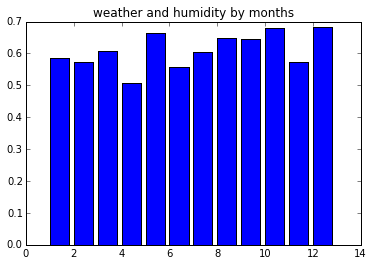

In [22]:
plt.bar([n for n in range(1, 13)], x['humidity'])
plt.title("weather and humidity by months")
plt.show()

2. Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

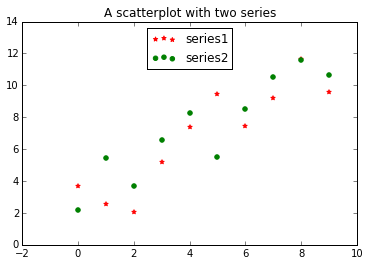

In [23]:
xs = range(10)
plt.scatter(xs, 5 * np.random.rand(10) + xs, color='r', marker='*', label='series1')
plt.scatter(xs, 5 * np.random.rand(10) + xs, color='g', marker='o', label='series2')
plt.title("A scatterplot with two series")
plt.legend(loc=9)
plt.show()

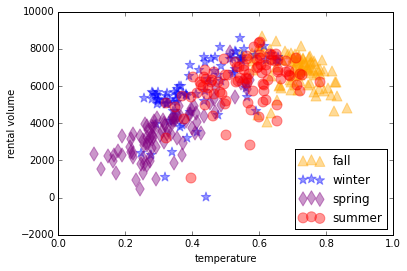

In [24]:
w = weather[['season_desc', 'temp', 'total_riders']]
fall = w.loc[w['season_desc'] == 'Fall']
winter = w.loc[w['season_desc'] == 'Winter']
spring = w.loc[w['season_desc'] == 'Spring']
summer = w.loc[w['season_desc'] == 'Summer']

plt.scatter(fall['temp'], fall['total_riders'], color='orange', marker='^', label='fall', s=100, alpha=.41)
plt.scatter(winter['temp'], winter['total_riders'], color='blue', marker='*', label='winter', s=100, alpha=.41)
plt.scatter(spring['temp'], spring['total_riders'], color='purple', marker='d', label='spring', s=100, alpha=.41)
plt.scatter(summer['temp'], summer['total_riders'], color='red', marker='o', label='summer', s=100, alpha=.41)

plt.legend(loc='lower right')
plt.xlabel('temperature')
plt.ylabel('rental volume')
plt.show()

Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

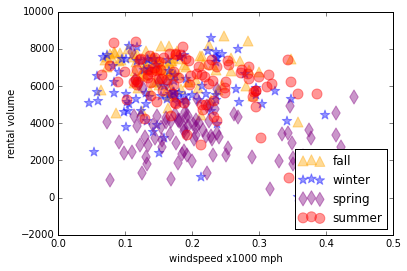

In [25]:
w = weather[['season_desc', 'windspeed', 'total_riders']]
fall = w.loc[w['season_desc'] == 'Fall']
winter = w.loc[w['season_desc'] == 'Winter']
spring = w.loc[w['season_desc'] == 'Spring']
summer = w.loc[w['season_desc'] == 'Summer']

plt.scatter(fall['windspeed'], fall['total_riders'], color='orange', marker='^', label='fall', s=100, alpha=.41)
plt.scatter(winter['windspeed'], winter['total_riders'], color='blue', marker='*', label='winter', s=100, alpha=.41)
plt.scatter(spring['windspeed'], spring['total_riders'], color='purple', marker='d', label='spring', s=100, alpha=.41)
plt.scatter(summer['windspeed'], summer['total_riders'], color='red', marker='o', label='summer', s=100, alpha=.41)

plt.legend(loc='lower right')
plt.xlabel('windspeed x1000 mph')
plt.ylabel('rental volume')


4. How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.


In [26]:
usage = pd.read_table('usage_2012.tsv')

In [27]:
stations = pd.read_table('stations.tsv')

In [28]:
stations.head()

,id,station,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,restaurant,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,1,20th & Bell St,31000,38.856100,-77.051200,7,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18th & Eads St.,31001,38.857250,-77.053320,6,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,20th & Crystal Dr,31002,38.856400,-77.049200,9,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15th & Crystal Dr,31003,38.860170,-77.049593,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,38.857866,-77.059490,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
c = DataFrame(counts.index, columns=['station'])
c['counts'] = counts.values
s = stations[['station','lat','long']]
u = pd.concat([usage['station_start']], axis=1, keys=['station'])
counts = u['station'].value_counts()
m = pd.merge(s, c, on='station')
 

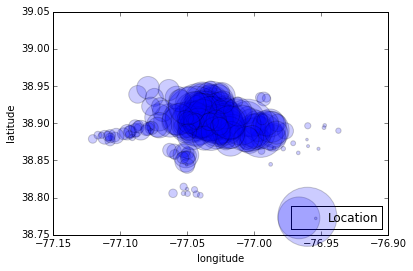

In [33]:
plt.scatter(m['long'], m['lat'], c='b', label='Location', s=(m['counts'] * .05), alpha=.2)

plt.legend(loc='lower right')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()